First, what is a gradient? Remember calc 3 :)

$f(x,y) = x^2sin(y)
$

The gradient is an operator $\nabla$ that acts on $f$ (takes $f$ as an argument), and returns a vector of the partial derivatives.

$
\nabla f(x,y) = [\frac{\partial f}{\partial x}, \frac{\partial f}{\partial y}]
$

$
\frac{\partial f}{\partial x} = 2xsin(y)
$

$
\frac{\partial f}{\partial y} = x^2cos(y)
$

$
\nabla f(x,y) = [2xsin(y), x^2cos(y)]
$

The gradient is also the direction of quickest increase of the function.

In [31]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def sum_of_squares(v: list) -> float:
    """
    Computes the sum of squares for a vector v
    """
    return sum(v_i ** 2 for v_i in v)

In [22]:
import math
def f(x):
    return (np.power(x,3)*np.cos(x/2) + .5)*np.sqrt(4-np.power(x,2))
#     return x**2

def grad_f(f,x,h):
    return (f(x+h) - f(x))/h

### Estimating Gradients

In [23]:
def partial_difference_quotient(f, v, i, h):
    w = np.array([v_j + (h if j == i else 0) for j, v_j in enumerate(v)])
    return (f(w) - f(v)) / h

In [24]:
def estimate_gradient(f, v, h=0.001):
    return [partial_difference_quotient(f, v, i, h) for i, _ in enumerate(v)]

In [48]:
v = np.arange(-1.8, 1.8, 0.001)
grad_est = estimate_gradient(f, v)

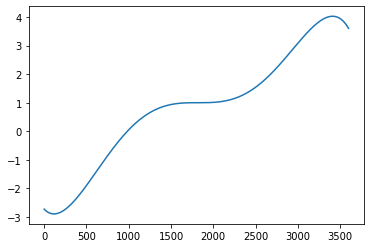

In [49]:
plt.plot([f(x) for x in v])

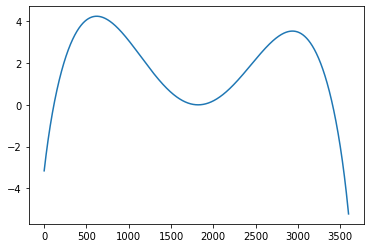

In [50]:
plt.plot(sum([x for x in grad_est]))

In [51]:
sum([f(x)*0.001 for x in v])

3.020980266108109

### Using the gradient

In [194]:
def step(v, direction, step_size):
    out = []
    for v_i, d_i in zip(v, direction):
        out.append(v_i + step_size * d_i)
    return out

def sum_of_squares_gradient(v: list) -> list:
    return [2*v_i for v_i in v]

def distance(v1, v2):
    return np.sqrt(sum([v1_i + v2_i for v1_i, v2_i in zip(v1,v2)]))

v = np.random.randint(-10,10, 2)
tolerance = 0.000001

In [195]:
step_x = []
step_y = []
while True:
# for _ in range(1):
    step_x.append(v[0])
    step_y.append(v[1])
    gradient = sum_of_squares_gradient(v)
    next_v = step(v, gradient, -0.01)
    if distance(next_v, v) < tolerance:
        break
    v = next_v
    

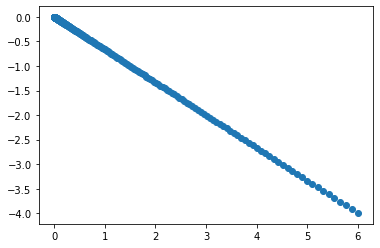

In [196]:
plt.scatter(x=step_x, y=step_y)